In [14]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"
os.environ["THEANO_FLAGS"]="mode=FAST_RUN,device=cuda0,floatX=float32"

In [15]:
## set random seeds
import numpy as np
np.random.seed(10)
import keras

In [25]:
from __future__ import print_function
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
import os

batch_size = 1000
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [26]:
print(x_train.shape[1:])
print(type(x_train))

(32, 32, 3)
<type 'numpy.ndarray'>


In [27]:
import numpy as np

In [28]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,:,0], rgb[:,:,:,1], rgb[:,:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    gray = np.expand_dims(gray, axis=3)
    print(gray.shape)
    return gray

In [29]:
x_train=rgb2gray(x_train)
x_test=rgb2gray(x_test)

(50000, 32, 32, 1)
(10000, 32, 32, 1)


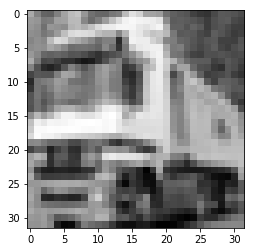

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
plt.imshow(x_train[1,:,:,0], cmap='gray')

In [33]:
print(x_train[0].shape)

(32, 32, 1)


In [34]:
print(x_test.shape)

(10000, 32, 32, 1)


In [35]:
model = Sequential()
model.add(Convolution2D(6, (5, 5), border_mode='valid', data_format="channels_last", input_shape=(32, 32, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))   
model.add(Convolution2D(16, (5, 5), border_mode='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(120))
model.add(Activation('relu'))
model.add(Dense(84))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

/usr/local/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (5, 5), padding="valid", data_format="channels_last", input_shape=(32, 32, 1...)`
  
/usr/local/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5), padding="valid")`
  """


In [36]:
print(x_train[0].shape)
print(x_train[0,:,:,:])

(32, 32, 1)
[[[ 61.2111]
  [ 44.9847]
  [ 48.023 ]
  ...
  [137.0222]
  [130.4358]
  [128.7672]]

 [[ 18.8024]
  [  0.    ]
  [ 10.0762]
  ...
  [ 94.6907]
  [ 89.9901]
  [ 94.0328]]

 [[ 23.9545]
  [  8.8914]
  [ 31.4071]
  ...
  [ 90.2782]
  [ 90.876 ]
  [ 80.2191]]

 ...

 [[172.9052]
  [153.7659]
  [156.6532]
  ...
  [133.875 ]
  [ 35.7334]
  [ 38.0797]]

 [[146.339 ]
  [128.6987]
  [143.5434]
  ...
  [152.5896]
  [ 69.2633]
  [ 59.7957]]

 [[150.6573]
  [136.6542]
  [146.7751]
  ...
  [188.5304]
  [123.9759]
  [ 98.9767]]]


In [37]:
y_test.shape[1]

10

In [38]:
# initiate RMSprop optimizer
sgd = SGD(lr=0.1, decay=0, momentum=0.5, nesterov=False)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['categorical_crossentropy', 'accuracy']
             )

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [39]:
type(x_train)

numpy.ndarray

In [41]:
import time
start_time = time.time()
history = model.fit(x_train, y_train,
         batch_size=batch_size,
         nb_epoch=epochs,
         # show_accuracy=True,
         validation_data=(x_test, y_test),
         shuffle=True)
print("--- Training Time - %s seconds ---" % (time.time() - start_time))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 6s - loss: 2.3055 - categorical_crossentropy: 2.3055 - acc: 0.1150 - val_loss: 2.3014 - val_categorical_crossentropy: 2.3014 - val_acc: 0.1195
Epoch 2/100
50000/50000 [==============================] - 5s - loss: 2.2997 - categorical_crossentropy: 2.2997 - acc: 0.1267 - val_loss: 2.2982 - val_categorical_crossentropy: 2.2982 - val_acc: 0.1292
Epoch 3/100
50000/50000 [==============================] - 5s - loss: 2.2961 - categorical_crossentropy: 2.2961 - acc: 0.1342 - val_loss: 2.2943 - val_categorical_crossentropy: 2.2943 - val_acc: 0.1340
Epoch 4/100
50000/50000 [==============================] - 5s - loss: 2.2913 - categorical_crossentropy: 2.2913 - acc: 0.1401 - val_loss: 2.2884 - val_categorical_crossentropy: 2.2884 - val_acc: 0.1387
Epoch 5/100
50000/50000 [==============================] - 5s - loss: 2.2840 - categorical_crossentropy: 2.2840 - acc: 0.1451 - val_loss: 2.27

50000/50000 [==============================] - 5s - loss: 1.3804 - categorical_crossentropy: 1.3804 - acc: 0.5153 - val_loss: 1.4436 - val_categorical_crossentropy: 1.4436 - val_acc: 0.4914
Epoch 82/100
50000/50000 [==============================] - 5s - loss: 1.3712 - categorical_crossentropy: 1.3712 - acc: 0.5185 - val_loss: 1.4384 - val_categorical_crossentropy: 1.4384 - val_acc: 0.4919
Epoch 83/100
50000/50000 [==============================] - 5s - loss: 1.3714 - categorical_crossentropy: 1.3714 - acc: 0.5171 - val_loss: 1.4131 - val_categorical_crossentropy: 1.4131 - val_acc: 0.4994
Epoch 84/100
50000/50000 [==============================] - 5s - loss: 1.3635 - categorical_crossentropy: 1.3635 - acc: 0.5216 - val_loss: 1.4097 - val_categorical_crossentropy: 1.4097 - val_acc: 0.5011
Epoch 85/100
50000/50000 [==============================] - 5s - loss: 1.3616 - categorical_crossentropy: 1.3616 - acc: 0.5225 - val_loss: 1.4115 - val_categorical_crossentropy: 1.4115 - val_acc: 0.499

In [66]:
print(history.history.keys())
from scipy.ndimage.filters import gaussian_filter1d

train_acc=gaussian_filter1d(history.history['acc'], sigma=2)
train_loss=gaussian_filter1d(history.history['loss'], sigma=2)
test_acc=gaussian_filter1d(history.history['val_acc'], sigma=2)
test_loss=gaussian_filter1d(history.history['val_loss'], sigma=2)


['acc', 'loss', 'val_acc', 'val_loss']


In [69]:
gaussian_filter1d(history.history['loss'], sigma=2)

array([2.30259632, 2.30259622, 2.3025958 , 2.30259485, 2.30259354,
       2.30259236, 2.30259171, 2.30259156, 2.30259154, 2.30259147,
       2.30259156, 2.30259217, 2.30259345, 2.30259504, 2.3025963 ,
       2.30259676, 2.3025965 , 2.30259584, 2.30259506, 2.30259443,
       2.30259428, 2.30259483, 2.30259601, 2.30259752, 2.30259883,
       2.30259944, 2.3025994 , 2.30259957, 2.30260086, 2.30260305,
       2.30260474, 2.30260465, 2.30260289, 2.30260068, 2.30259887,
       2.30259735, 2.30259568, 2.30259398, 2.30259281, 2.30259255,
       2.3025931 , 2.30259404, 2.30259504, 2.30259594, 2.30259666,
       2.30259714, 2.30259744, 2.30259783, 2.30259853, 2.30259945,
       2.30260028, 2.30260083, 2.30260111, 2.30260118, 2.30260099,
       2.30260034, 2.3025991 , 2.30259747, 2.30259594, 2.30259493,
       2.30259442, 2.302594  , 2.30259331, 2.30259238, 2.30259157,
       2.30259123, 2.30259151, 2.30259228, 2.30259324, 2.30259404,
       2.30259455, 2.30259499, 2.30259611, 2.30259943, 2.30260

Text(0.5,1,'Test Accuracy: 0.10')

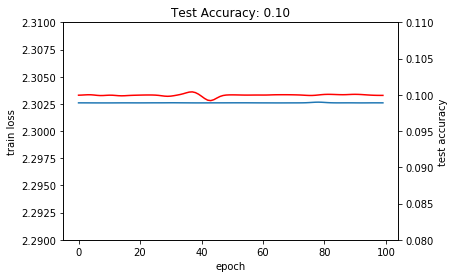

In [75]:

_, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(range(epochs), train_loss)
ax2.plot(range(len(test_acc)), test_acc, 'r')
ax1.set_ylim(ymin = 2.29, ymax = 2.31)
ax1.set_xlabel('epoch')
ax1.set_ylabel('train loss')
ax2.set_ylim(ymin = 0.08, ymax = 0.11)
ax2.set_ylabel('test accuracy')
ax2.set_title('Test Accuracy: {:.2f}'.format(test_acc[-1]))